In [11]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sudalairajkumar/covid19-in-india")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/covid19-in-india


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv(path + "/covid_19_india.csv")
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [15]:
df.describe()

,Sno,Cured,Deaths,Confirmed
count,18110.000000,1.811000e+04,18110.000000,1.811000e+04
mean,9055.500000,2.786375e+05,4052.402264,3.010314e+05
std,5228.051023,6.148909e+05,10919.076411,6.561489e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4528.250000,3.360250e+03,32.000000,4.376750e+03
50%,9055.500000,3.336400e+04,588.000000,3.977350e+04
75%,13582.750000,2.788698e+05,3643.750000,3.001498e+05
max,18110.000000,6.159676e+06,134201.000000,6.363442e+06


In [16]:
df.isna().sum()

,0
Sno,0
Date,0
Time,0
State/UnionTerritory,0
ConfirmedIndianNational,0
ConfirmedForeignNational,0
Cured,0
Deaths,0
Confirmed,0


In [17]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

In [18]:
df.shape

(18110, 9)

In [19]:
df_c = df.copy()

In [20]:
df_c['ConfirmedForeignNational'].isna().sum() , df_c['ConfirmedIndianNational'].isna().sum()

(np.int64(0), np.int64(0))

In [21]:
df_c.drop(columns=['ConfirmedForeignNational','ConfirmedIndianNational'], inplace=True)

In [22]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Sno                   18110 non-null  int64         
 1   Date                  18110 non-null  datetime64[ns]
 2   Time                  18110 non-null  object        
 3   State/UnionTerritory  18110 non-null  object        
 4   Cured                 18110 non-null  int64         
 5   Deaths                18110 non-null  int64         
 6   Confirmed             18110 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 990.5+ KB


In [23]:
df_c['State/UnionTerritory'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli', 'Bihar****',
       'Madhya Pradesh***', 'Himanchal Pradesh', 'Karanataka',
       'Maharashtra***'], dtype=object)

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le = LabelEncoder()

le.fit(df['State/UnionTerritory'])
df_c['State/UnionTerritory'] = le.transform(df_c['State/UnionTerritory'])

In [26]:
df_c.head()

,Sno,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,22,0,0,1
1,2,2020-01-31,6:00 PM,22,0,0,1
2,3,2020-02-01,6:00 PM,22,0,0,2
3,4,2020-02-02,6:00 PM,22,0,0,3
4,5,2020-02-03,6:00 PM,22,0,0,3


In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
sc = StandardScaler()

In [29]:
num = []
for i in df_c.columns:
  if df_c[i].dtype == 'object':
    continue
  else:
    num.append(i)

In [34]:
num.remove('Sno')
num.remove('Date')

In [35]:
df_c[num] = sc.fit_transform(df_c[num])

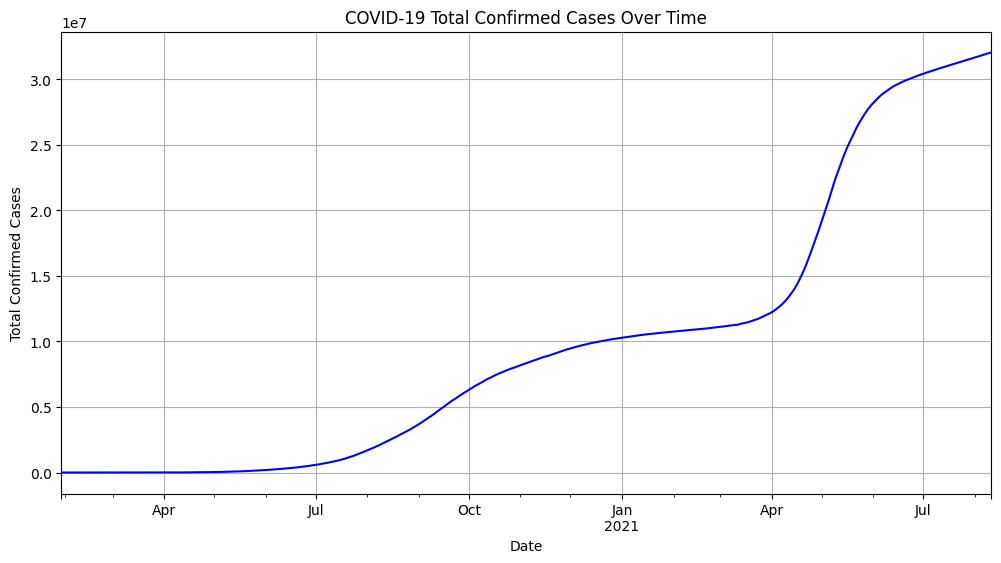

In [36]:
plt.figure(figsize=(12,6))
df.groupby("Date")["Confirmed"].sum().plot(kind="line", color="blue")
plt.title("COVID-19 Total Confirmed Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Confirmed Cases")
plt.grid(True)
plt.show()

/tmp/ipython-input-1544523677.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.values, y=top_states.index, palette="viridis")


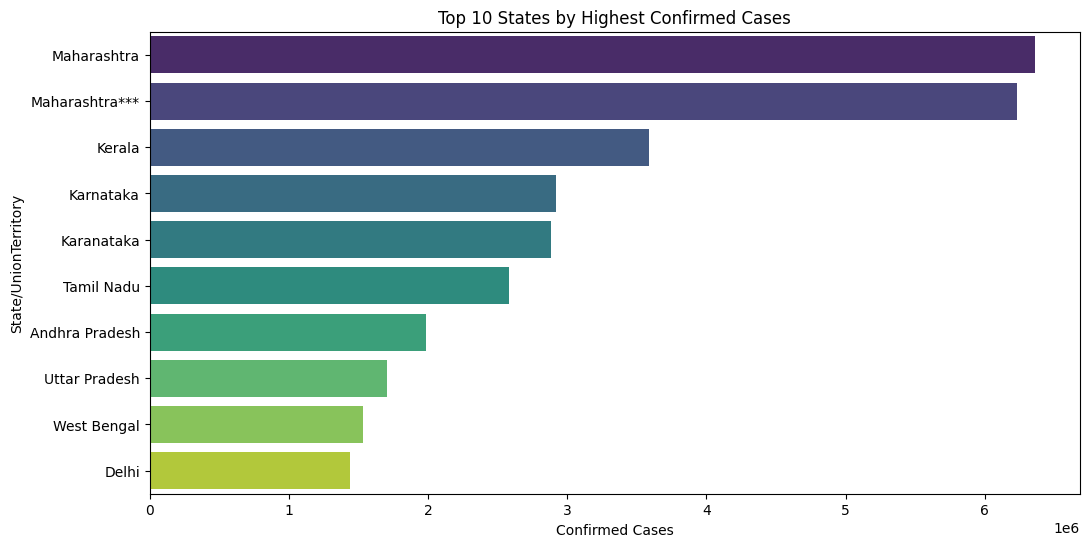

In [37]:
top_states = df.groupby("State/UnionTerritory")["Confirmed"].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_states.values, y=top_states.index, palette="viridis")
plt.title("Top 10 States by Highest Confirmed Cases")
plt.xlabel("Confirmed Cases")
plt.ylabel("State/UnionTerritory")
plt.show()

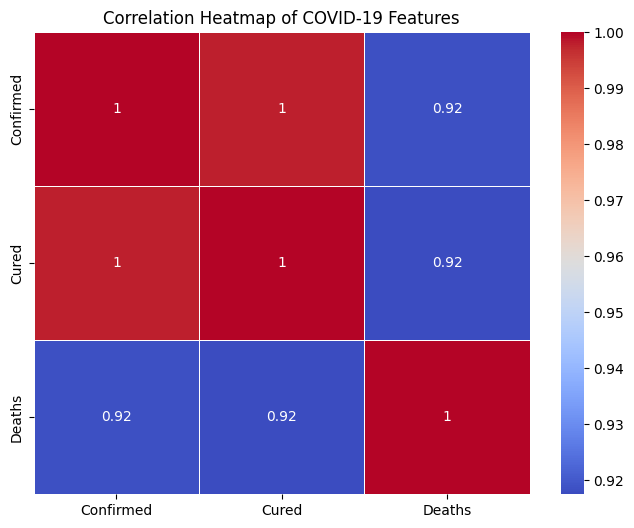

In [38]:
plt.figure(figsize=(8,6))
corr = df[["Confirmed", "Cured", "Deaths"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of COVID-19 Features")
plt.show()